# Experiment: Compare Previous Disengaged

**Goal**: Compare models with various disengaged regressors- combined, on their own or alone, specifically with filtered values now that taus have been solved for.

Additional Notes

Related notebooks:

* `2024_03_20_tau_sweep_prev_disengaged_combo.ipynb`
* `2024_03_20_tau_sweep_prev_disengaged_binary_combo.ipynb`

> Written by Jess Breda 

Models being compared:

1. Base model (psytrack features)
2. Only prev violation
3. Only prev tns
4. Only filt prev violation
5. Binary prev tns and viol
5. Binary prev tns and filter viol
6. Combo prev tns and viol then filter
7. Filt prev viol and filt prev tns

## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from multiglm.experiments.experiment import load_experiment

from multiglm.experiments.experiment_compare_models import ExperimentCompareModels

from multiglm.features.design_matrix_generator import *
from multiglm.features.design_matrix_generator_PWM import *

from multiglm.models.multiclass_logistic_regression import MultiClassLogisticRegression

from multiglm.visualizations.model_visualizer import ModelVisualizerCompare

from multiglm.data import ANIMAL_IDS
from multiglm.experiments import STANDARD_SIGMAS


sns.set_context("talk")
%load_ext autoreload
%autoreload 2

## Model Configs

### Compare 

In [2]:
# design matrix columns shared between all models being fit
shared_cols = {
    "session": lambda df: (copy(df.session)),
    "bias": lambda df: (add_bias_column(df)),
    "s_a": lambda df: (standardize(df.s_a)),
    "s_b": lambda df: (standardize(df.s_b)),
    "prev_avg_stim": lambda df: (prev_avg_stim(df, mask_prev_violation=True)),
    "prev_correct": lambda df: (prev_correct_side(df)),
    "prev_choice": lambda df: (prev_choice(df)),
    "labels": {"column_name": "choice"},
}

models_config = {
    "combined_prev_tns_and_viol_filt": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
            "filt_prev_disengaged": lambda df: exp_filter_column(
                combine_two_cols(
                    prev_trial_not_started(df),
                    prev_violation(df),
                    operator.add,
                ),
                df.session,
                get_animals_tau(df, "prev_tns_viol_combo"),
            ),
        },
    },
    "base": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
        },
    },
    "prev_tns_only": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
            "prev_tns": lambda df: (prev_trial_not_started(df)),
        },
    },
    "prev_viol_only": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
            "prev_viol": lambda df: (prev_violation(df)),
        },
    },
    "filt_prev_viol_only": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
            "filt_prev_viol": lambda df: (
                filtered_prev_viol(df, get_animals_tau(df, var_name="prev_violation"))
            ),
        },
    },
    "binary_prev_tns_and_viol": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
            "prev_viol": lambda df: (prev_violation(df)),
            "prev_tns": lambda df: (prev_trial_not_started(df)),
        },
    },
    "binary_prev_tns_filt_prev_viol": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
            "prev_tns": lambda df: (prev_trial_not_started(df)),
            "filt_prev_viol": lambda df: (
                filtered_prev_viol(df, get_animals_tau(df, var_name="prev_violation"))
            ),
        },
    },
}


params = {
    "animals": ANIMAL_IDS,
    "data_type": "new_trained",
    "sigmas": STANDARD_SIGMAS,
    "random_state": 47,
    "eval_train": True,
    "null_mode": "multi",
    "model_config": models_config,
}

save_name = "2024_03_22_compare_prev_disengaged_filt.pkl"

ORDER = [
    "base",
    "prev_tns_only",
    "prev_viol_only",
    "filt_prev_viol_only",
    "binary_prev_tns_and_viol",
    "binary_prev_tns_filt_prev_viol",
    "combined_prev_tns_and_viol_filt",
]

## Run

In [3]:
experiment = ExperimentCompareModels(params)
experiment.run()
experiment.save(save_name)

Loading dataset type : new_trained
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']



 >>>> evaluating animal W051 <<<<

 ***** evaluating model combined_prev_tns_and_viol_filt w/ sigma 0.07 *****
Optimization terminated successfully.
         Current function value: 64811.744717
         Iterations: 27
         Function evaluations: 39
         Gradient evaluations: 39

 ***** evaluating model combined_prev_tns_and_viol_filt w/ sigma 0.13 *****
         Current function value: 64474.476039
         Iterations: 25
         Function evaluations: 68
         Gradient evaluations: 56

 ***** evaluating model combined_prev_tns_and_viol_filt w/ sigma 0.25 *****
Optimization terminated successfully.
         Current function value: 64347.570796
         Iterations: 25
         Function evaluations: 37
         Gradient evaluations: 37

 ***** evaluating model combined_prev_tns_and_viol_filt w/ sigma 0.5 *****
Optimization terminated successfully.
         Current function value: 64308.439466
         Iterations: 24
         Function evaluations: 35
         Gradient evaluati

## Visualize

In [10]:
experiment = load_experiment(save_name)
mvc = ModelVisualizerCompare(experiment)

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_42791/2431235986.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for model_name, model_df in df.groupby("model_name"):
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

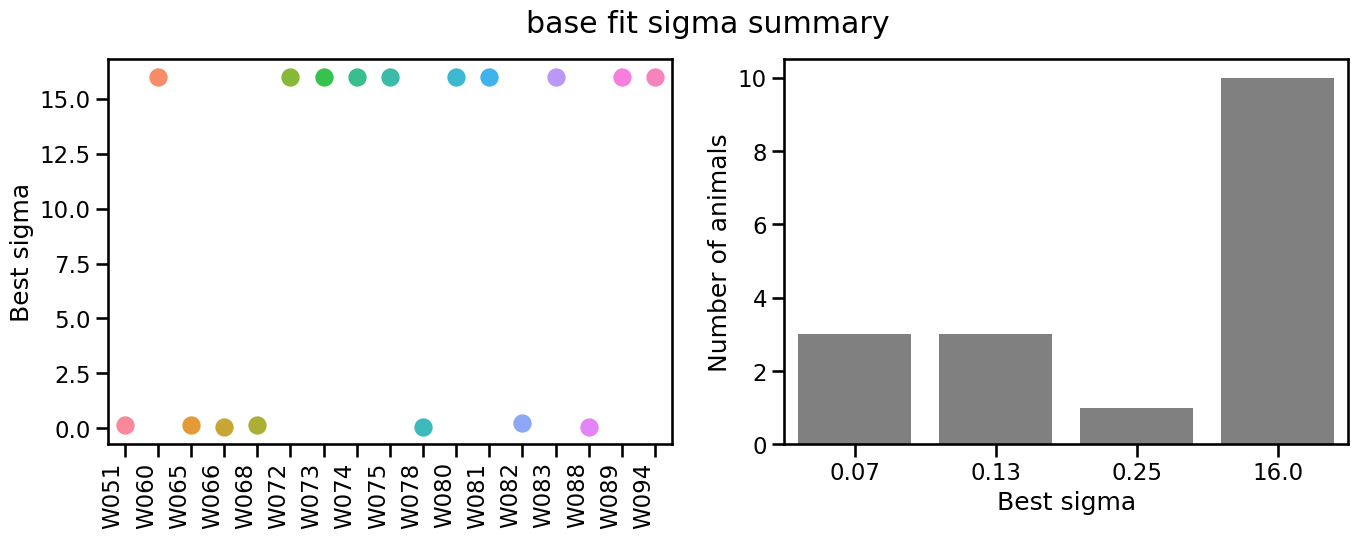

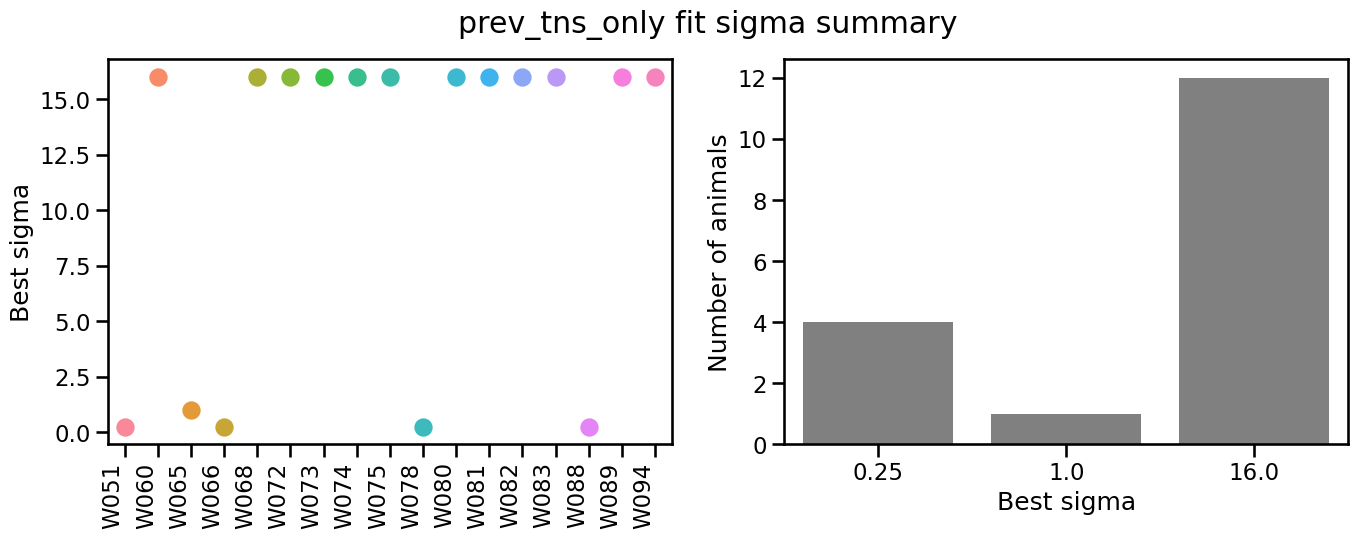

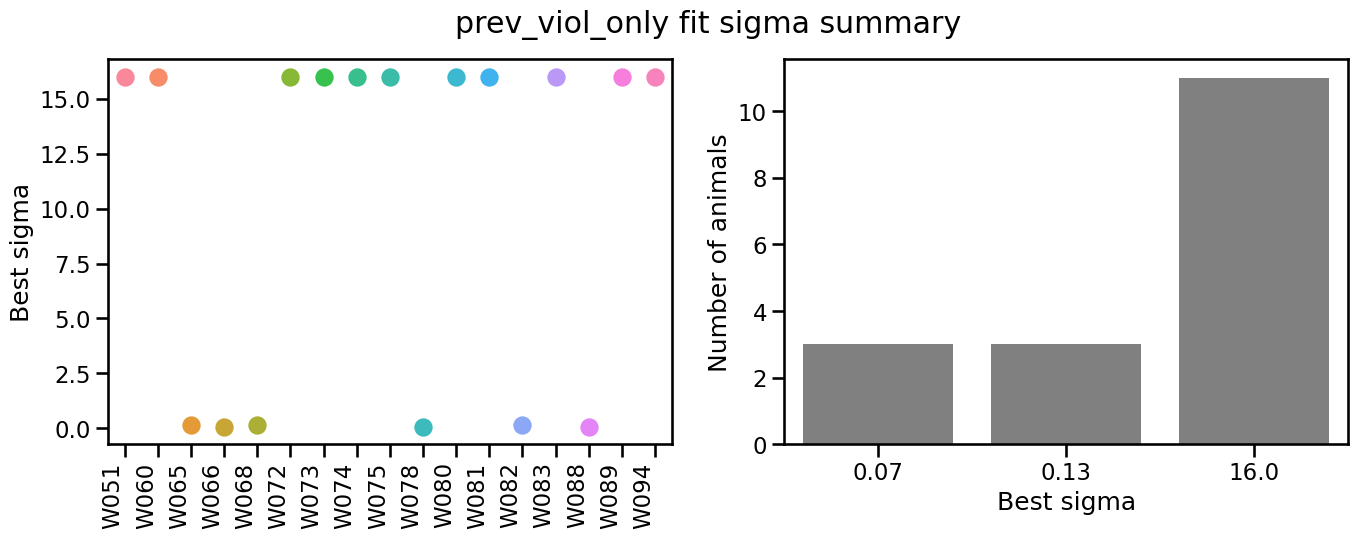

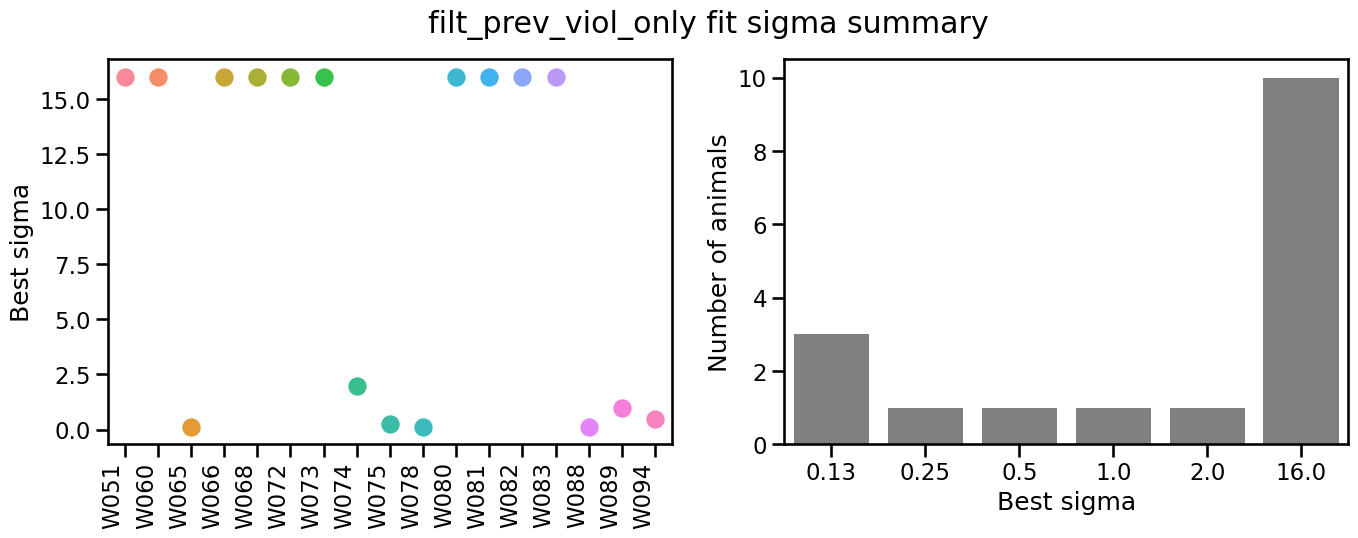

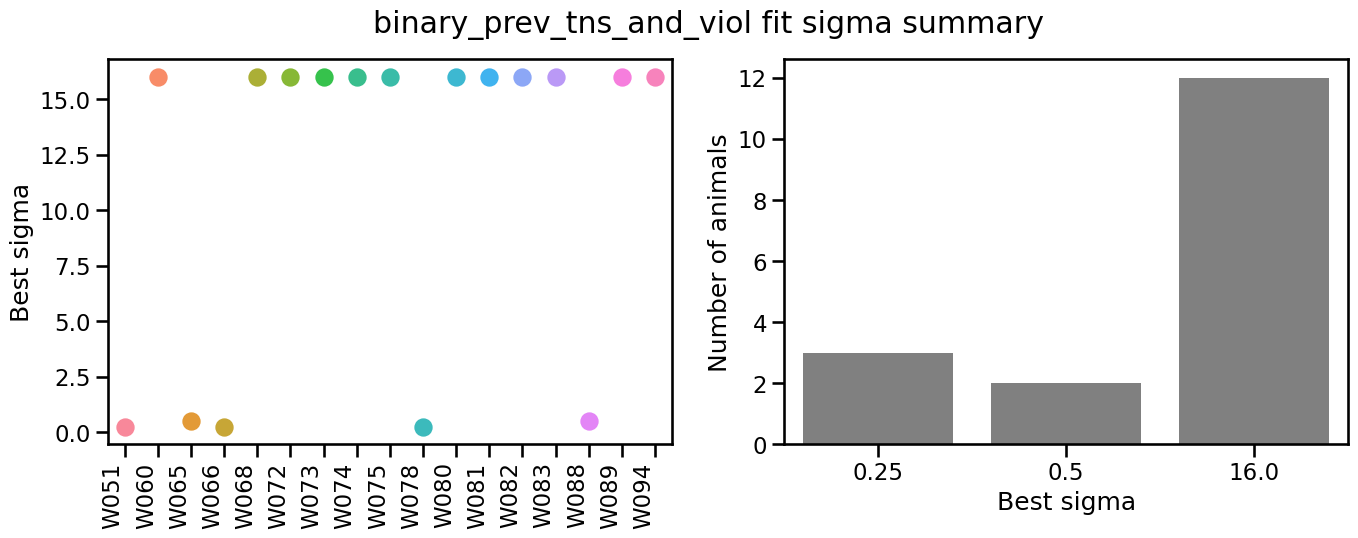

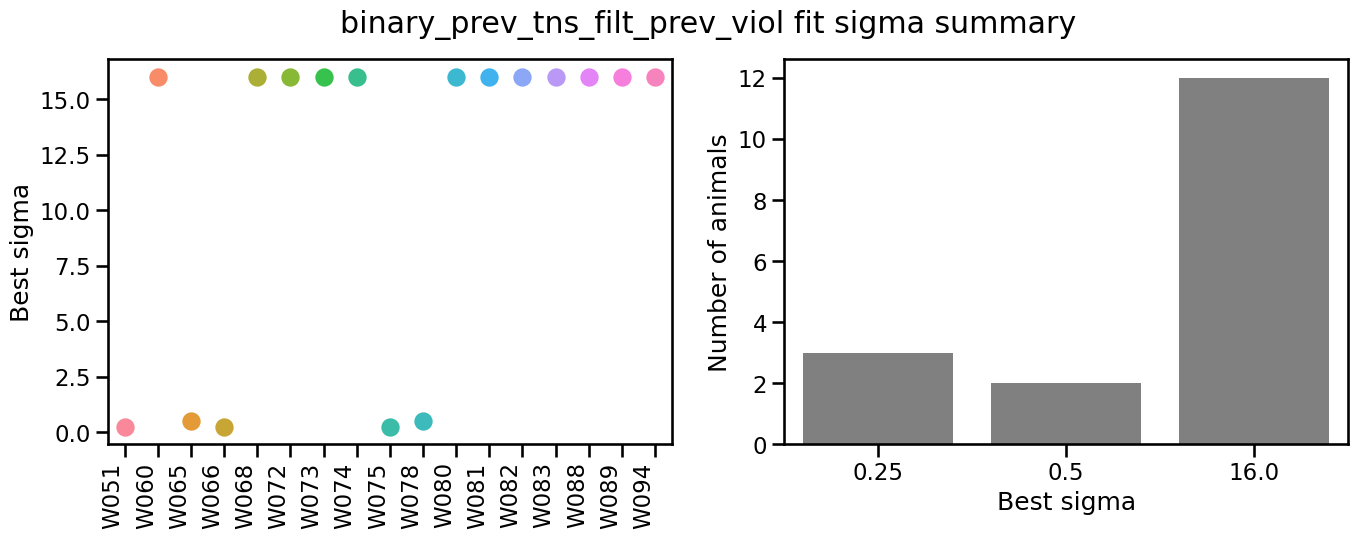

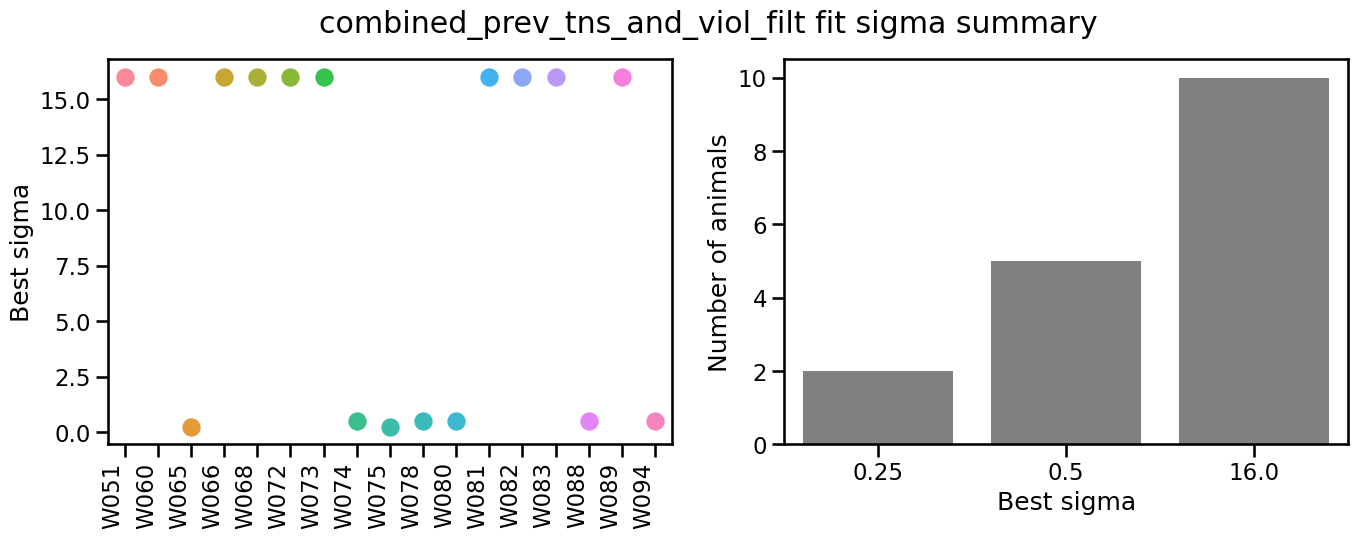

In [5]:
df = mvc.find_best_fit(group="model_name")
df["model_name"] = pd.Categorical(df["model_name"], categories=ORDER, ordered=True)
for model_name, model_df in df.groupby("model_name"):
    mvc.plot_sigma_summary(model_df, title=f"{model_name} fit sigma summary")

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_42791/2667047998.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ii, (model_name, model_df) in enumerate(best_fit_by_model.groupby("model_name")):


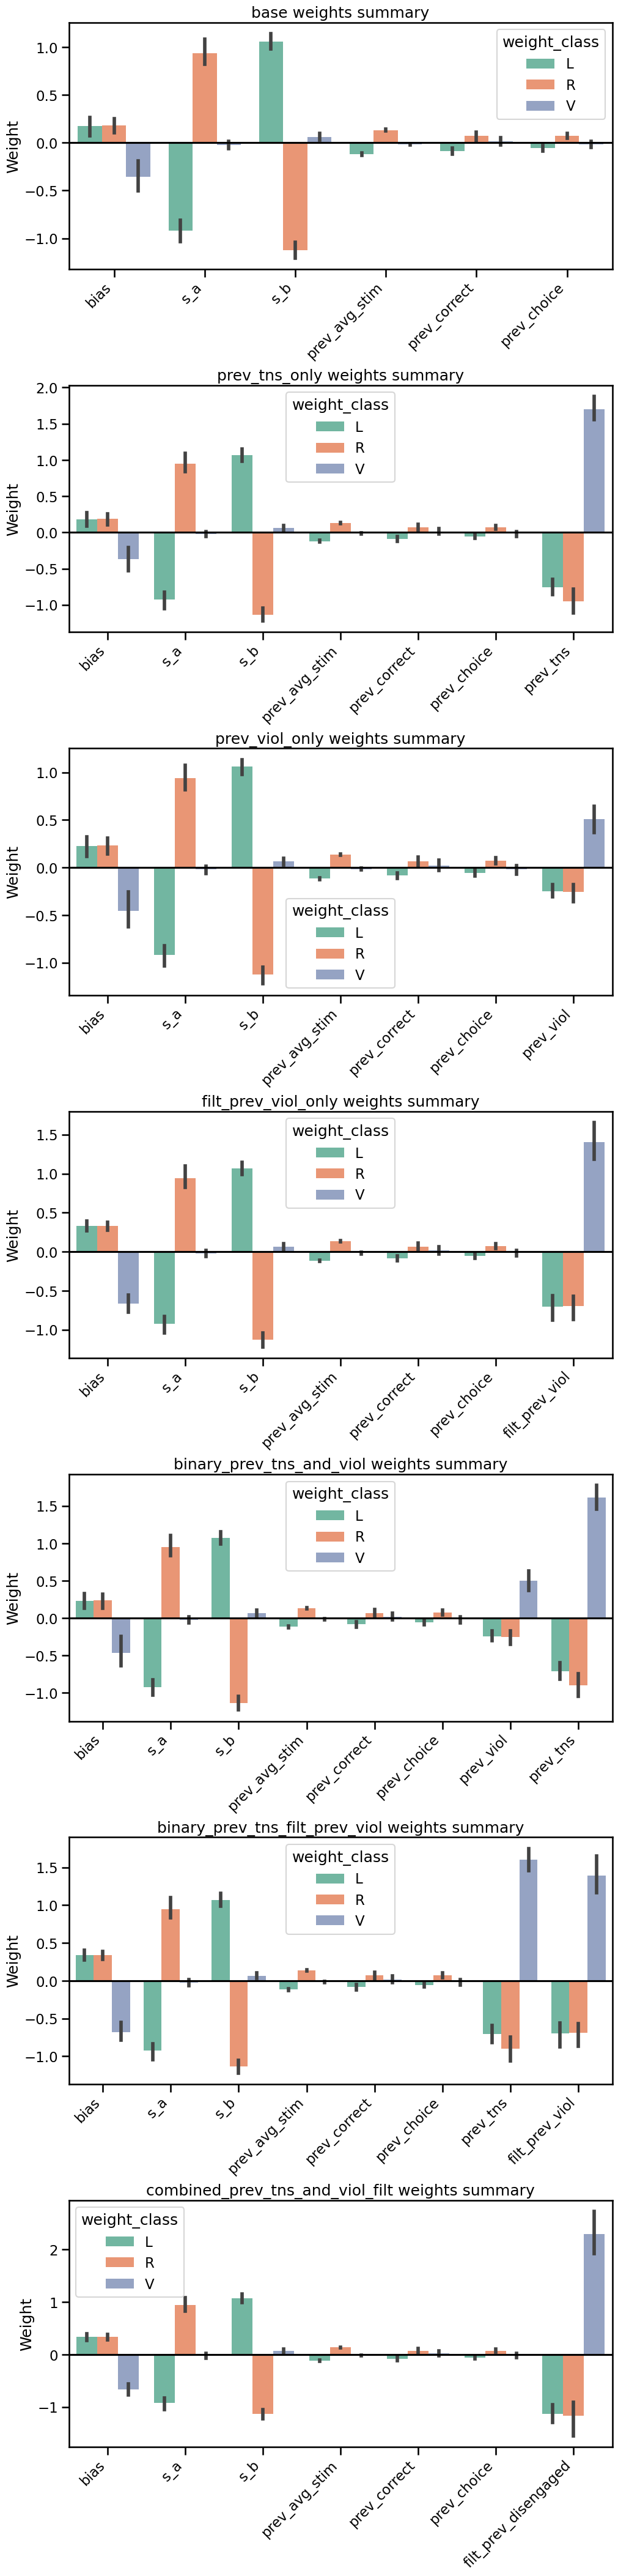

In [6]:
fig, ax = plt.subplots(
    len(ORDER), 1, figsize=(10, len(ORDER) * 6), constrained_layout=True, sharey=False
)

best_fit_by_model = mvc.find_best_fit(group=["animal_id", "model_name"])
best_fit_by_model["model_name"] = pd.Categorical(
    best_fit_by_model["model_name"], categories=ORDER, ordered=True
)

for ii, (model_name, model_df) in enumerate(best_fit_by_model.groupby("model_name")):
    unpacked = mvc.unpack_features_and_weights(model_df)

    mvc.plot_weights_summary(
        df=unpacked,
        ax=ax[ii],
        palette="Set2",
        title=f"{model_name} weights summary",
    )

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'base'),
  Text(1, 0, 'prev_tns_only'),
  Text(2, 0, 'prev_viol_only'),
  Text(3, 0, 'filt_prev_viol_only'),
  Text(4, 0, 'binary_prev_tns_and_viol'),
  Text(5, 0, 'binary_prev_tns_filt_prev_viol'),
  Text(6, 0, 'combined_prev_tns_and_viol_filt')])

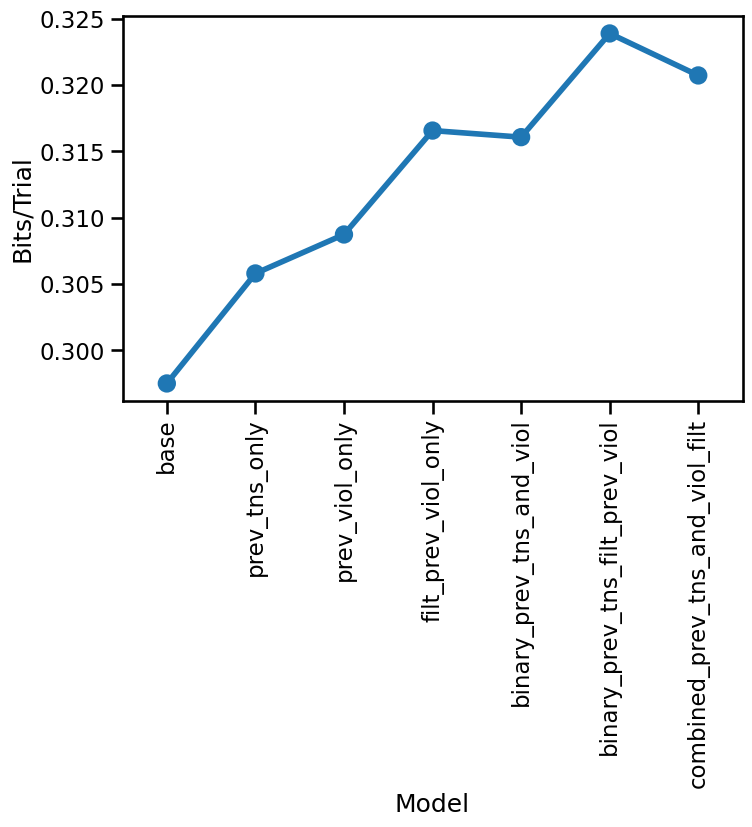

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
mvc.plot_model_comparison(
    hue=None,
    ax=ax,
    order=ORDER,
    errorbar=None,
)
plt.xticks(rotation=90)

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


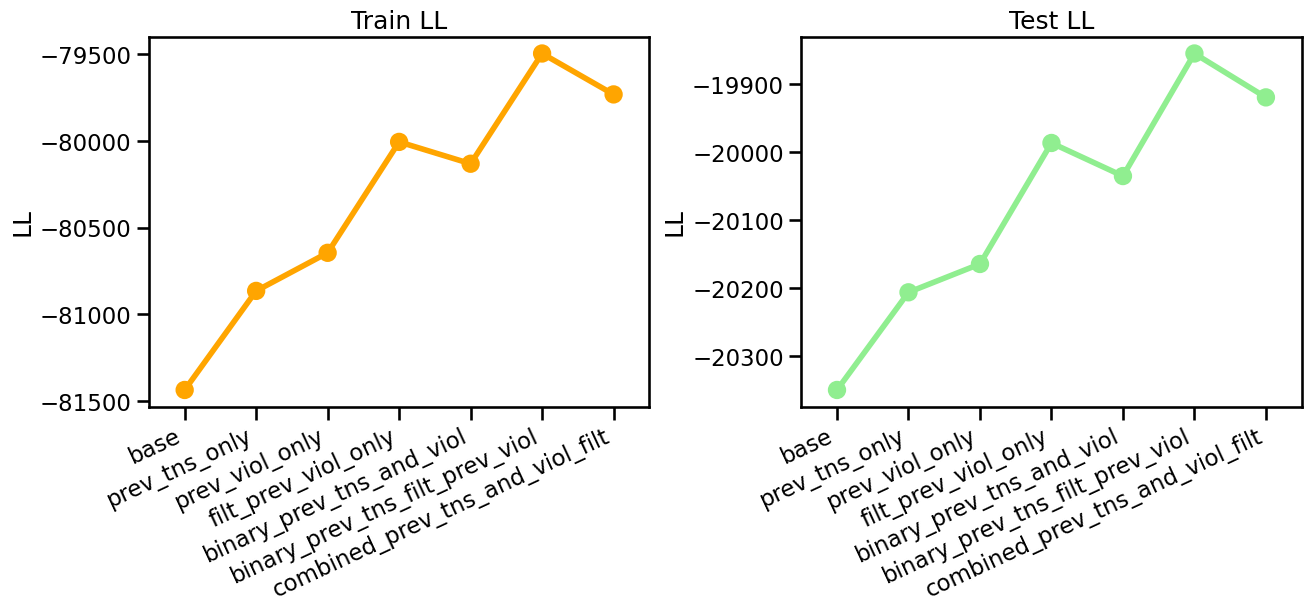

In [8]:
mvc.plot_train_and_test_ll(
    order=ORDER,
    errorbar=None,
)

<Axes: title={'center': 'Model Improvement- mu: 494.15 std: 418.51 \n base -> binary_prev_tns_filt_prev_viol'}, xlabel='animal_id', ylabel='Delta test LL (new - base)'>

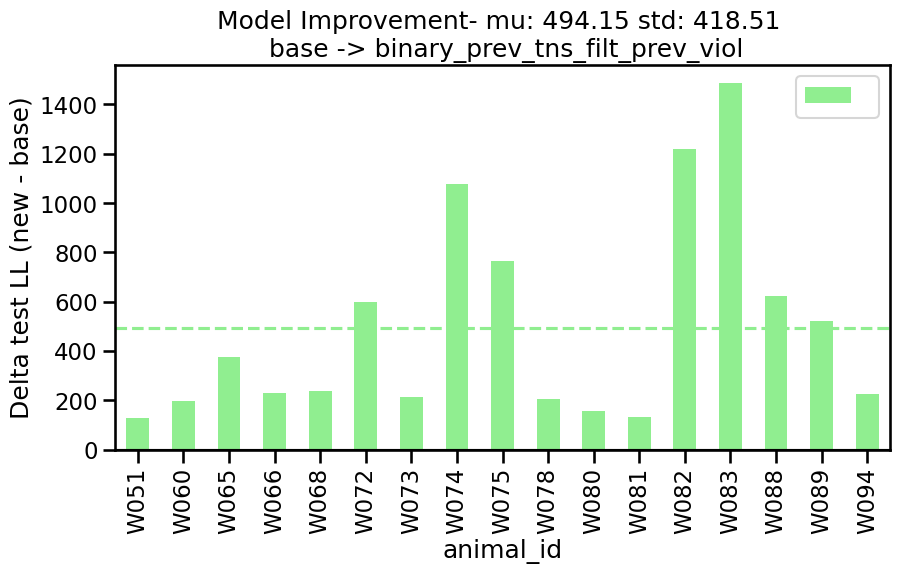

In [12]:
mvc.plot_ll_delta_by_animal(
    base_model_name=ORDER[0],
    new_model_name=ORDER[-2],
    type="test",
)

<Axes: title={'center': 'Model Improvement- mu: 64.46 std: 83.33 \n combined_prev_tns_and_viol_filt -> binary_prev_tns_filt_prev_viol'}, xlabel='animal_id', ylabel='Delta test LL (new - base)'>

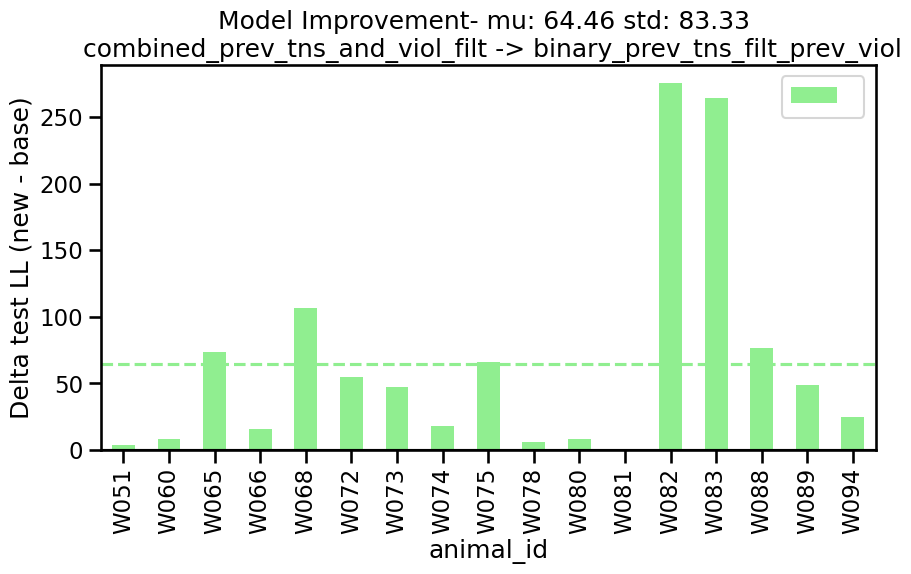

In [14]:
mvc.plot_ll_delta_by_animal(
    base_model_name=ORDER[-1],
    new_model_name=ORDER[-2],
    type="test",
)